In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import pearsonr, spearmanr
import os
from random import randint

In [2]:
# est_file = 'Estimate/csxrnaseq_lymph_normalized_results.txt'
est_fol = '/Users/irffanalahi/Research/Research_code/likephased-seq/extfig5g_on_WB/above_below_2percent/rd'
est_files = os.listdir(est_fol)

gt_fol = '/Users/irffanalahi/Research/Research_code/likephased-seq/extfig5g_on_WB/above_below_2percent/CSx'
gt_files = os.listdir(gt_fol)

outfol = '/Users/irffanalahi/Research/Research_code/likephased-seq/extfig5g_on_WB/above_below_2percent/boxplots'
os.mkdir(outfol)

# est_data = pd.read_csv(est_file, sep='\t', index_col=0)
# gt_data = pd.read_csv(gt_file, sep='\t', index_col=0)

# est_df = pd.DataFrame(est_data)
# gt_df = pd.DataFrame(gt_data)

# Transpose dataframes
# est_df = est_df.T
# gt_df = gt_df.T

In [3]:
def corr(gt_files, est_df, correlation):
    corr_lists = []
    labels = []

    for file in gt_files:
        print(file)
        gt_file = gt_fol + '/' + file
        gt_data = pd.read_csv(gt_file, sep='\t', index_col=0)
        gt_df = pd.DataFrame(gt_data)
        #gt_df = gt_df.T
        gt_df = gt_df.sort_index()
        corr_list = []
        for col in list(est_df.columns):
            est_list = np.array(est_df[col])
            gt_list = np.array(gt_df[col])
            corr_list.append(correlation(est_list, gt_list)[0])
            print(col, correlation(est_list, gt_list)[0])
        corr_lists.append(corr_list)
    
        labels.append(file.split('_')[0])
    return corr_lists, labels

In [4]:
def plot_estimate(corr_lists, labels, est_df, ax, est_file, correlation, colors):
    ax.boxplot(corr_lists, labels=labels, widths=0.6)
        
    for i in range(len(corr_lists)):
        for j in range(len(corr_lists[i])):
            p = corr_lists[i][j]
            if i == 0:
                ax.plot(i + 1, p, marker='o', markersize=7, color=colors[j], label=est_df.columns[j])
            else:
                ax.plot(i + 1, p, marker='o', markersize=7, color=colors[j])
    # ax.set_ylim(y_lim)
    ax.set_title(est_file)
    return fig, ax

No handles with labels found to put in legend.


BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_nocov_mincpg3_ABSreadcount_divisioned.txt_CSxOut.txt
CSx_some.txt
nB 0.8611399177993121
NK 0.9072479624235651
mNeu 0.9678157988212893
DC -0.14771719573200534


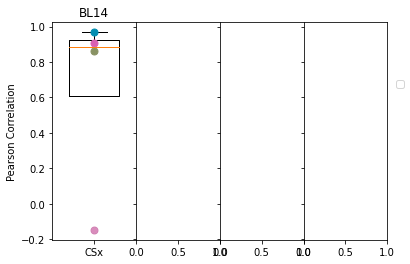

In [5]:
fig, axs = plt.subplots(1, 4, sharey=True)

colors = []

for i in range(len(est_files)):
    file = est_files[i]
    print(file)
    est_file = est_fol + '/' + file
    est_data = pd.read_csv(est_file, sep='\t', index_col=0)
    est_df = pd.DataFrame(est_data)
    #est_df = est_df.T
    est_df = est_df.sort_index()
    est_name = file.split('_')[0]
    if i == 0:
        n = len(est_df.columns)
        for j in range(n):
            colors.append('#%06X' % randint(0, 0xFFFFFF))
    p_lists, labels = corr(gt_files, est_df, pearsonr)
    plot_estimate(p_lists, labels, est_df, axs[i], est_name, 'Pearson Correlation', colors)

fig.subplots_adjust(wspace=0)
plt.legend(loc=(1.1, 0.7))
axs[0].set_ylabel('Pearson Correlation')
fig.savefig(outfol + '/pearson_corr.pdf',dpi=300, bbox_inches='tight')

BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_nocov_mincpg3_ABSreadcount_divisioned.txt_CSxOut.txt
CSx_some.txt


KeyError: 'healthy_normal-NU-46-Bulk-WB.bg'

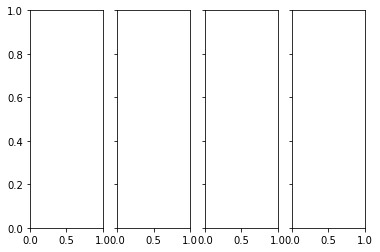

In [6]:
fig2, axs2 = plt.subplots(1, 4, sharey=True)
# y_lim = [0.0, 1.0]
for i in range(len(est_files)):
    file = est_files[i]
    print(file)
    est_file = est_fol + '/' + file
    est_data = pd.read_csv(est_file, sep='\t', index_col=0)
    est_df = pd.DataFrame(est_data)
    est_df = est_df.T
    est_df = est_df.sort_index()
    est_name = file.split('_')[0]
    s_lists, labels = corr(gt_files, est_df, spearmanr)
    plot_estimate(s_lists, labels, est_df, axs2[i], est_name, 'Spearman Correlation', colors)

fig2.subplots_adjust(wspace=0)
plt.legend(loc=(1.1, 0.7))
axs2[0].set_ylabel('Spearman Correlation')
fig2.savefig(outfol + '/spearman_corr.pdf',dpi=300, bbox_inches='tight')